In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Steps include:
#1. Prepare data into tensors
#2. Build or pick a pre-trained model (select loss function & optimizer, build training loop)
#3. Fit the model to the data and make a prediction
#4. Evaluate the model
#5. Improve through experimentation
#6. Save and reload your trained model

In [3]:
#Load in PyTorch's building blocks for neural networks
from torch import nn

In [4]:
print(torch.__version__)

2.1.0


# Creating a Simple Dataset Using the Linear Regression Formula

In [5]:
weight = 0.7
bias   = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [6]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [7]:
len(X), len(y)

(50, 50)

# Splitting Our Data into Training and Test Sets

In [8]:
#Training, validation, and test sets

In [9]:
train_split = int(0.8 * len(X))
train_split

40

In [10]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [11]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Building a Function to Visualize our Data

In [83]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    #Plot test data in red
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    #Are there predictions?
    if predictions is not None: 
        #Plot the predictions if they exist
        plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")
    
    #Show the legend
    plt.legend(prop={"size": 14});

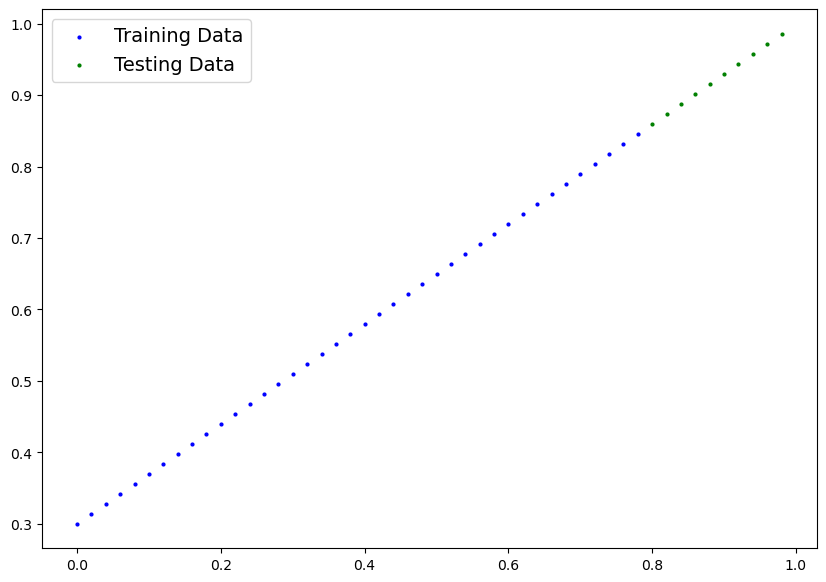

In [13]:
plot_predictions();

# Creating our First PyTorch Model for Linear Regression

In [14]:
#Our model is trained via gradient descent and backpropagation

In [15]:
class LinearRegressionModel(nn.Module): #almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
        #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input data
        return self.weights * x + self.bias

# Breaking Down What's Happening in Our PyTorch Linear Regression Model

*Looking at the above chunk of code:

*nn.Module is the subclass.

*We initialize the parameters(weights and bias) as random values to be used in various computations.

*requires_grad=True activates gradient descent (True by default) so PyTorch tracks the gradient of that parameter to be 
used with torch.autograd.

*Any subclass of nn.Module needs to override forward(). Forward method defines the forward computations in the model.

# Discussing Some of the Most Important PyTorch Model Building Classes

*torch.nn - contains all of the building blocks for computational graphs(neural networks).

*torch.nn.Parameter - what parameters our model should try to learn. 
Often a layer from torch.nn will set these for us.

*torch.nn.Module - the base class for all neural network modules. 
If you subclass it, you should overwrite forward().

*torch.optim - this is where the optimizers in PyTorch live, which help with gradient descent.

*def forward() - All nn.Module subclasses require you to overwrite forward().
This method defines what happens in the forward computation.

*torch.utils.data.Dataset - represents a map between key(label) and sample(features) pairs of your data.
Such as images and their associated labels.

*torch.utils.data.Dataloader - Creates a Python iterable over a torch dataset (allows you to iterate over your data).

# Checking Out the Internals of Our PyTorch Model

In [16]:
#Remember our Workflow:

#1. Get data ready (turn into tensors)
# (torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader)

#2. Build or pick a pre-trained model
# (for loss function: torch.nn, torch.nn.Module, torchvision.models)
# (for optimizers: torch.optim)

#3. Fit the model to the data and make a prediction

#4. Evaluate the model
# (torchmetrics)

#5. Improve through experimentation
# (torch.utils.tensorboard)

#6. Save and reload your trained model

In [17]:
#Check contents of our PyTorch model
torch.manual_seed(42) #optional random seed setting for reproducability

#Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check parameter values
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
#set known parameter values (see above)
weight, bias

(0.7, 0.3)

# Making Predictions with our Random Model Using Inference Mode

In [20]:
#Predict using torch.inference_mode()
#inference_mode() does not track the gradient since we only need to do so during training, not making predictions
#Data passed through our model is run through the forward() method

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

#If you get NotImplementedError, make sure the defined __init__ and forward methods are in line with each other
#with regards to indentation. 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

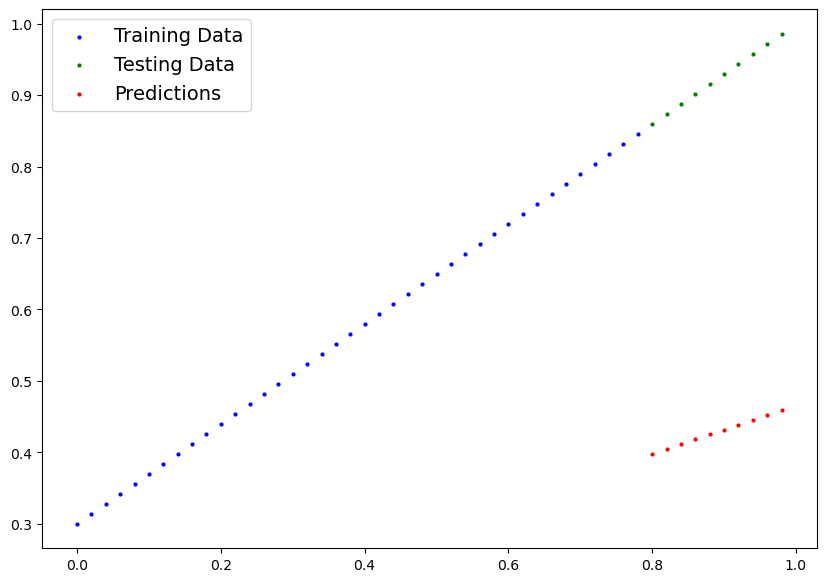

In [22]:
plot_predictions(predictions=y_preds)
#Note predictions in bottom right of graph, very bad predictions

# Training a Model Intuition (The Things We Need)

In [23]:
#We use loss functions to measure how poorly our predictions fit to the test data (squared error, cross-entropy,etc.)

#We use optimizers to take into account the loss of a model and adjusts the model's parameters so as to minimize the loss,
#or equivalently by maximizing the likelihood.

#Common loss functions:
#Mean absolute error (MAE) for regression torch.nn.L1Loss()
#Squared error loss (MSE) for regression torch.nn.MSELoss()
#Binary cross-entropy for binary classification torch.nn.BCELoss()
#Cross entropy torch.nn.CrossEntropyLoss()

#Common optimizers:
#Stochastic gradient descent torch.optim.SGD()
#Adam optimizer torch.optim.Adam() (high-performance adaptive gradient descent)

In [24]:
#For PyTorch, we need a training loop and a testing loop.

# Setting Up an Optimizer and a Loss Function

In [25]:
#Setup a loss function
loss_fn = nn.L1Loss() #MAE L1 norm loss function

#Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #Stochastic gradient descent
                           lr=0.01)                      #lr = learning rate

# PyTorch Training Loop Steps and Intuition

In [26]:
#Things needed to set up a training loop:
#0. Loop through the data and do steps 1-5:
#1. Forward pass (moving data through our model's forward() functions to make predictions)
#2. Calculate the loss
#3. Optimizer zero grad
#4. Loss backward (move backwards through the network to calculate each parameter's gradient wrt the loss) **backpropagation**
#5. Optimizer step (optimizer adjusts parameters via learning rate) **gradient descent**

# Writing Code for a PyTorch Training Loop

In [27]:
torch.manual_seed(42)
epochs = 1 #an epoch is one loop through the data

#0.
for epoch in range(epochs):
    #set model to training mode
    model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients
    
    #1. Forward Pass
    y_pred = model_0(X_train)
    
    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Backpropagation on the loss to calculate gradients
    loss.backward()
    
    #5. Optimizer step (gradient descent)
    optimizer.step()
    
    ##Testing
    model_0.eval() #turns off gradient tracking
    
    #Print current parameter values
    print(model_0.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


# Reviewing the Steps in a Training Loop Step by Step

# Running Our Training Loop Epoch by Epoch & Seeing What Happens

In [28]:
#Run above training loop repeatedly to see loss decrease and parameter values approach "true" values

In [29]:
weight, bias #pre-set "true" parameter values

(0.7, 0.3)

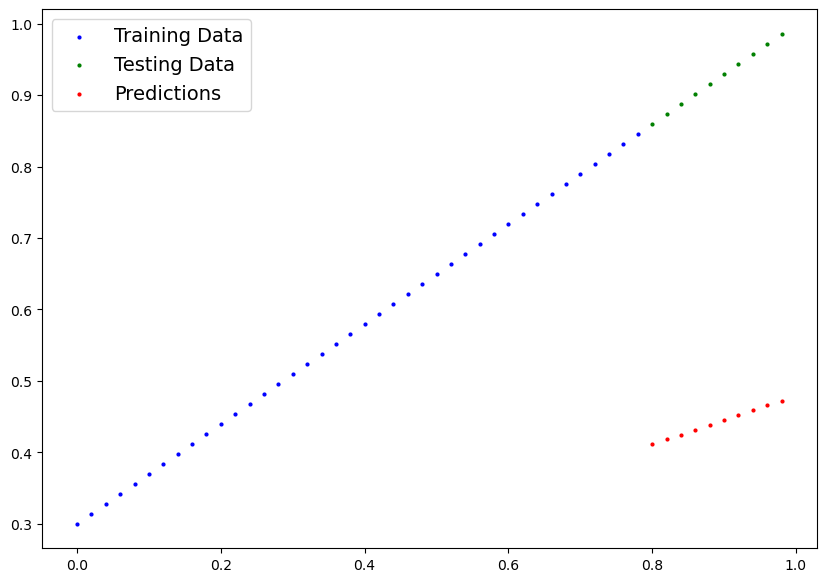

In [30]:
#Make some predictions with model_0 as is
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

# Writing Testing Loop Code & Discussing What's Happening Step by Step

In [31]:
#See ###Testing section of training/testing loop below

In [32]:
#Reset model to initial values
torch.manual_seed(42)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
torch.manual_seed(42)
epochs = 200 #an epoch is one loop through the data

#Create empty lists for storing loss values
epoch_count = []
train_loss_values = []
test_loss_values = []

#0.
for epoch in range(epochs):
    #set model to training mode
    model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients
    
    #1. Forward Pass
    y_pred = model_0(X_train)
    
    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Backpropagation on the loss to calculate gradients
    loss.backward()
    
    #5. Optimizer step (gradient descent)
    optimizer.step()
    
    ###Testing
    model_0.eval() #turns off model settings not needed for evaluation/testing (dropout, batchnorm)
    with torch.inference_mode(): #turns off gradient tracking
        #1. Forward Pass
        test_pred = model_0(X_test)
        
        #2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)
        
    #Print current values every 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

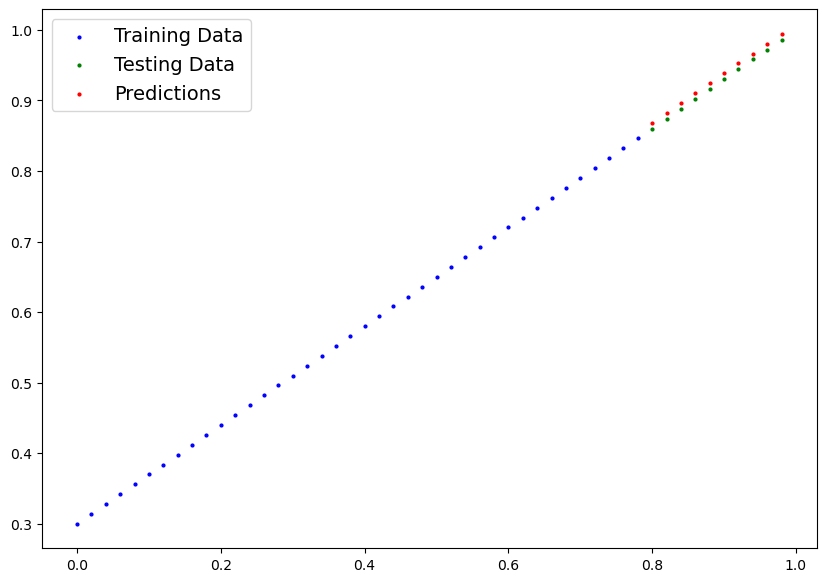

In [35]:
#Make some predictions with model_0
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

# Reviewing What Happens in a Testing Loop Step by Step

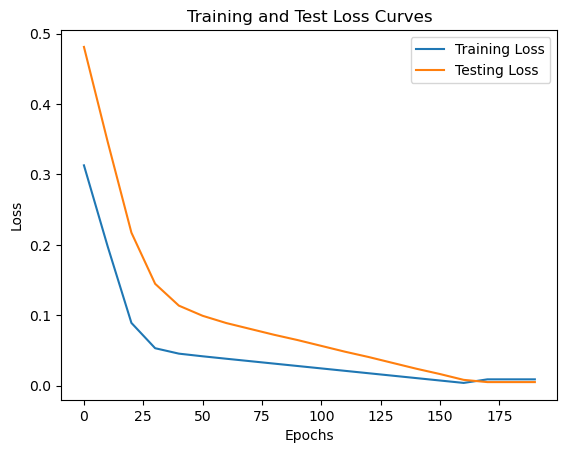

In [36]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Training Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Testing Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Writing Code to Save a PyTorch Model

In [37]:
#Three main methods

#1. torch.save() - save a PyTorch object in Python's pickle format
#2. torch.load() - load a saved PyTorch object
#3. torch.nn.Module.load_state_dict() - load a model's saved state dictionary

In [38]:
#Save our PyTorch model
from pathlib import Path

#1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "section3_model_0.pth" #PyTorch objects usually have .pth or .pt extensions
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models\section3_model_0.pth


# Writing Code to Load a PyTorch Model

In [ ]:
#Since we saved the model's state_dict(), we create a new instance of the model class and load the save 
#state_dict() into that.

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [40]:
#New instance of the model class
loaded_model_0 = LinearRegressionModel()

#Load saved state_dict into this new instance
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [41]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [42]:
#Predict with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [47]:
#Compare loaded model predictions with original predictions
loaded_model_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Setting Up to Practice Everything We Have Done Using Device Agnostic Code

In [48]:
#Load packages
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Check PyTorch version
torch.__version__

'2.1.0'

In [49]:
#Create Device Agnostic Code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using Device: {device}")

Using Device: cpu


# Putting Everything Together (Part 1): Data

In [54]:
#Theoretical pre-set "true" parameter values
weight = 0.875
bias = 0.18

#Range values
start = 0
end = 1
step = 0.01

#Create features and supervisor
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [55]:
#Training Testing Splits
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(80, 20)

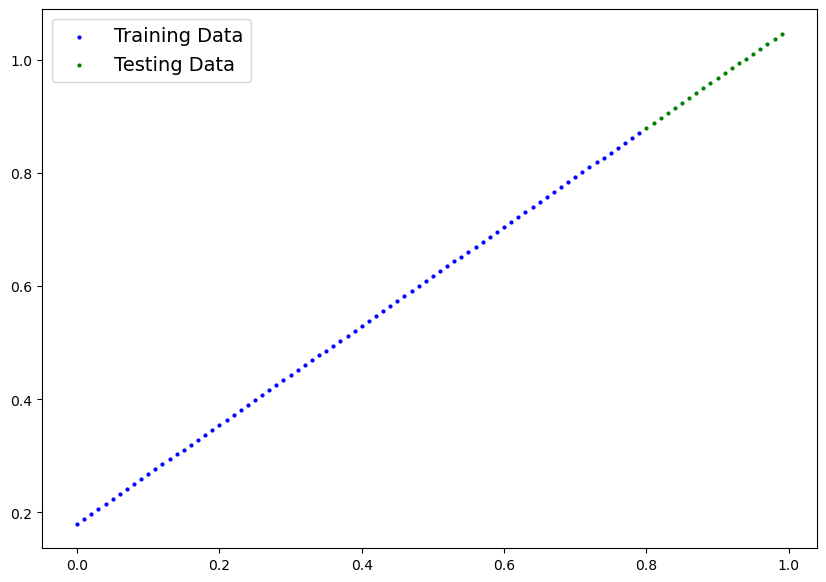

In [62]:
#Plot data using saved plot_predictions() function defined above
plot_predictions(X_train, y_train, X_test, y_test)

# Putting Everything Together (Part 2): Building a Model

In [77]:
#Create linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linear() to instantiate model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1) #One feature variable & one supervisor
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
#Set manual seed for reproducability
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Putting Everything Together (Part 3): Training a Model

In [59]:
#Check the model's device
next(model_1.parameters()).device

device(type='cpu')

In [60]:
#Move the model to GPU if available
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [78]:
#Training (loss function, optimizer, training loop, testing loop)

#Setup loss function
loss_fn = nn.L1Loss() #squared error loss

#Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

###Training Loop###################################################
torch.manual_seed(42)

epochs = 250

#Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    #1. Forward pass
    y_pred = model_1(X_train)
    
    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation
    loss.backward()
    
    #5. Optimizer step
    optimizer.step()
    
    ###Testing Loop################################################
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    #Print current values
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.6063755750656128 | Test loss: 0.5376096367835999
Epoch: 10 | Loss: 0.49077320098876953 | Test loss: 0.4022572636604309
Epoch: 20 | Loss: 0.3751707971096039 | Test loss: 0.2669048607349396
Epoch: 30 | Loss: 0.25956839323043823 | Test loss: 0.13155241310596466
Epoch: 40 | Loss: 0.14396601915359497 | Test loss: 0.013864373788237572
Epoch: 50 | Loss: 0.07126406580209732 | Test loss: 0.09737241268157959
Epoch: 60 | Loss: 0.06014809012413025 | Test loss: 0.12140550464391708
Epoch: 70 | Loss: 0.05584251880645752 | Test loss: 0.12422238290309906
Epoch: 80 | Loss: 0.05229474976658821 | Test loss: 0.12003876268863678
Epoch: 90 | Loss: 0.04886773228645325 | Test loss: 0.11239117383956909
Epoch: 100 | Loss: 0.04544071853160858 | Test loss: 0.1047435775399208
Epoch: 110 | Loss: 0.04201370105147362 | Test loss: 0.09709599614143372
Epoch: 120 | Loss: 0.03858668729662895 | Test loss: 0.08944840729236603
Epoch: 130 | Loss: 0.03515966609120369 | Test loss: 0.08180081844329834
Epoch: 1

In [79]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8710]])),
             ('linear_layer.bias', tensor([0.1833]))])

In [80]:
#"True" parameter values
weight, bias

(0.875, 0.18)

# Putting Everything Together (Part 4): Making Predictions with a Trained Model

In [81]:
#Turn on eval mode
model_1.eval()

#Make predictions on test data
with torch.inference_mode():
    y_preds = model_1(X_test)

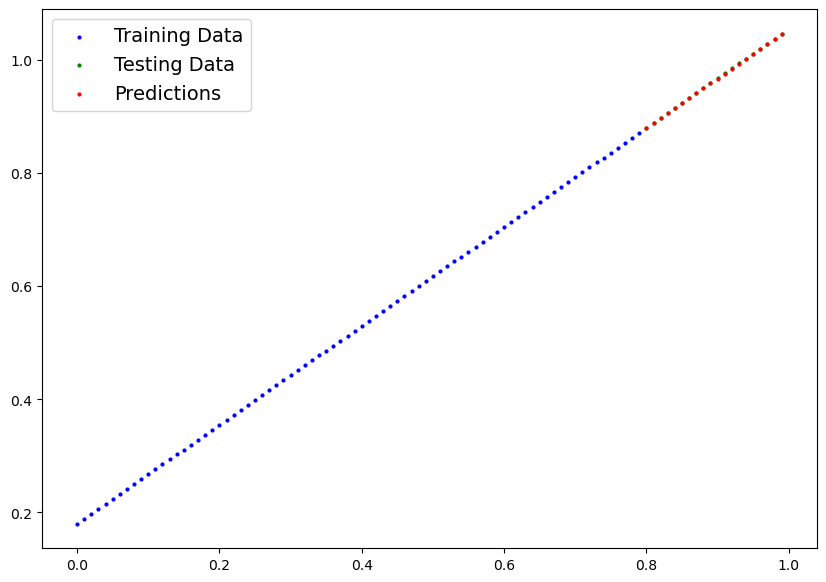

In [86]:
#Plot predictions
plot_predictions(predictions=y_preds.cpu())

# Putting Everything Together (Part 5): Saving & Loading a Trained Model

In [87]:
##############################Saving our PyTorch model#################################
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "section3_model_1.pth" #PyTorch objects usually have .pth or .pt extensions
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models\section3_model_1.pth


In [89]:
##############################Loading our PyTorch model#################################

#Create new instance of our model
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [90]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [91]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8710]])),
             ('linear_layer.bias', tensor([0.1833]))])

In [92]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8710]])),
             ('linear_layer.bias', tensor([0.1833]))])

In [93]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
    
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])